In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

In [ ]:
!unzip insurance.zip

# importing dataset

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('insurance.csv')

In [59]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Dealing with categorical values

In [62]:
object_cols = df.select_dtypes(include = 'object').columns
object_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [63]:
df[object_cols].nunique()

sex       2
smoker    2
region    4
dtype: int64

In [64]:

df = pd.get_dummies(data=df , columns=['sex' , 'smoker'] , drop_first=True)

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['region_Encoded'] = encoder.fit_transform(df.region)

In [66]:
features = df.drop(columns=['region' , 'charges'])
data = df.drop(columns = ['region'])

## plot graph

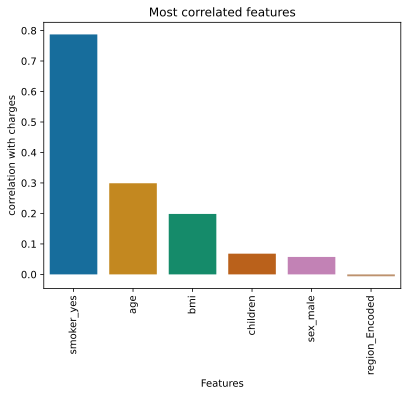

In [67]:
correlation = features.corrwith(data.charges).sort_values(ascending=False)

sns.barplot(x = correlation.index , y =correlation.values , palette='colorblind')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('correlation with charges')
plt.title('Most correlated features')
plt.show()

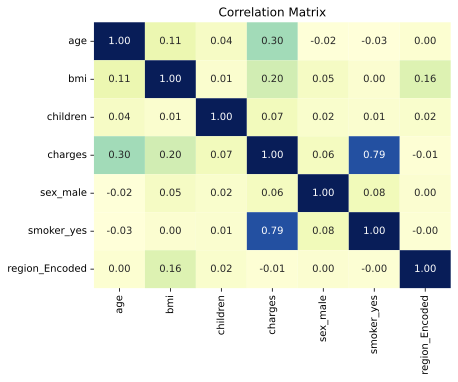

In [68]:
sns.heatmap(data.corr() , cmap = 'YlGnBu' , cbar = False , annot=True , fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [69]:
data.nunique()

age                 47
bmi                548
children             6
charges           1337
sex_male             2
smoker_yes           2
region_Encoded       4
dtype: int64

In [70]:

for i in ['smoker_yes' , 'children' , 'sex_male' , 'region_Encoded']:
  temp = data.groupby(by = i)
  print('-'*50)
  print('Group by ' , i)
  display(temp.mean().style.highlight_min(subset = 'charges',color = '#FF9999').highlight_max(subset = 'charges',color = '#99FF99'))
  print('-'*50)

--------------------------------------------------
Group by  smoker_yes


,age,bmi,children,charges,sex_male,region_Encoded
smoker_yes,,,,,,
0,39.385338,30.651795,1.090226,8434.268298,0.485902,1.516917
1,38.514599,30.708449,1.113139,32050.231832,0.580292,1.510949


--------------------------------------------------
--------------------------------------------------
Group by  children


,age,bmi,charges,sex_male,smoker_yes,region_Encoded
children,,,,,,
0,38.444251,30.550296,12365.975602,0.496516,0.200348,1.498258
1,39.453704,30.623148,12731.171832,0.512346,0.188272,1.537037
2,39.445833,30.978104,15073.563734,0.504167,0.229167,1.537500
3,41.566879,30.684331,15355.318367,0.509554,0.248408,1.445860
4,39.000000,31.391200,13850.656311,0.560000,0.120000,1.480000
5,35.611111,29.605000,8786.035247,0.555556,0.055556,2.055556


--------------------------------------------------
--------------------------------------------------
Group by  sex_male


,age,bmi,children,charges,smoker_yes,region_Encoded
sex_male,,,,,,
0,39.503021,30.377749,1.074018,12569.578844,0.173716,1.510574
1,38.917160,30.943129,1.115385,13956.751178,0.235207,1.520710


--------------------------------------------------
--------------------------------------------------
Group by  region_Encoded


,age,bmi,children,charges,sex_male,smoker_yes
region_Encoded,,,,,,
0,39.268519,29.173503,1.046296,13406.384516,0.503086,0.206790
1,39.196923,29.199785,1.147692,12417.575374,0.495385,0.178462
2,38.939560,33.355989,1.049451,14735.411438,0.519231,0.250000
3,39.455385,30.596615,1.141538,12346.937377,0.501538,0.178462


--------------------------------------------------


# Splitting the dataset

In [71]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(features , data['charges'] , test_size=0.2 , random_state=0)

# Building Model

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_regression_result(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    result = pd.DataFrame([[model_name, round(mae, 2), round(mse, 2), round(rmse, 2), round(r2, 2)]],
                        columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2-score'])
    return result


## Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(x_test)

In [75]:
result = get_regression_result('Linear-Regression' , y_test , y_pred)
result

,Model,MAE,MSE,RMSE,R2-score
0,Linear-Regression,3930.33,31845929.13,5643.22,0.8


## Random Forest Regression

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train , y_train)

RandomForestRegressor(random_state=0)

In [77]:
y_pred = rf.predict(x_test)

In [78]:
temp = get_regression_result('Random-Forest' , y_test , y_pred)
result = pd.concat([result , temp] , ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2-score
0,Linear-Regression,3930.33,31845929.13,5643.22,0.80
1,Random-Forest,2690.17,20601611.87,4538.90,0.87


## XGBoost

In [79]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred = xgb.predict(x_test)

# Final Result

In [81]:
temp = get_regression_result('XGBoost' , y_test , y_pred)
result = pd.concat([result , temp] , ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2-score
0,Linear-Regression,3930.33,31845929.13,5643.22,0.80
1,Random-Forest,2690.17,20601611.87,4538.90,0.87
2,XGBoost,2969.78,22690407.55,4763.44,0.86
